In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [4]:
#file_fast = uproot.open("/data/xenon/acolijn/G4FastSim/fast/fast_test.root")
#file_std = uproot.open("/data/xenon/acolijn/G4FastSim/standard/standard_test.root")
file_fast = uproot.open("/data/xenon/acolijn/G4FastSim/fast/fast_pencil.root")
file_std = uproot.open("/data/xenon/acolijn/G4FastSim/standard/standard_pencilroot")

fast = file_fast["ev"].arrays()
std = file_std["ev"].arrays()

cut = (std['ncomp']+std['nphot']==1) 

xh =ak.to_numpy(ak.flatten(std['xh'][cut]))
yh =ak.to_numpy(ak.flatten(std['yh'][cut]))
zh =ak.to_numpy(ak.flatten(std['zh'][cut]))
eh =ak.to_numpy(ak.flatten(std['eh'][cut]))

cutf = (fast['ncomp']+fast['nphot']==1) 

xf =ak.to_numpy(ak.flatten(fast['xh'][cutf]))
yf =ak.to_numpy(ak.flatten(fast['yh'][cutf]))
zf =ak.to_numpy(ak.flatten(fast['zh'][cutf]))
ef =ak.to_numpy(ak.flatten(fast['eh'][cutf]))
wf =ak.to_numpy(ak.flatten(fast['wh'][cutf]))

w = ak.to_numpy(fast['w'])

nstandard = len(ak.to_numpy(std['nclus']))
nfast = np.sum(np.exp(ak.to_numpy(fast['w'])))

rel_weight = nstandard/nfast
print('nstandard',nstandard)
print('nfast',nfast)
print('rel_weight',rel_weight)


nstandard 100000
nfast 57240.36120681206
rel_weight 1.7470190245427593


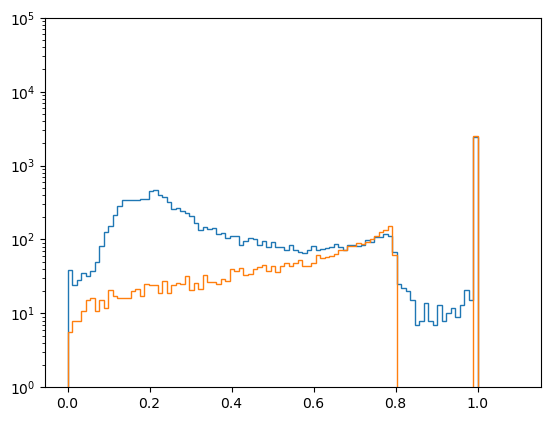

In [5]:
h = plt.hist(eh, bins=100, histtype='step', range=(0,1.1), label='standard')
h = plt.hist(ef, weights=np.exp(wf), bins=100, histtype='step', range=(0,1.1), label='fast')

plt.ylim(1,1e5)
plt.yscale('log')

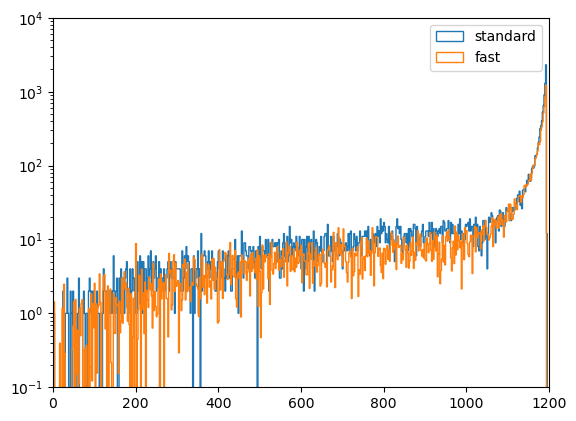

In [6]:
nb = 1000

h= plt.hist(np.sqrt(xh**2+yh**2), bins=nb, histtype='step', range=(0,2000), label='standard')
h= plt.hist(np.sqrt(xf**2+yf**2), weights=np.exp(wf)*rel_weight, bins=nb, histtype='step', range=(0,2000),label='fast')
#h= plt.hist(np.sqrt(xf[fid]**2+yf[fid]**2), bins=200, histtype='step', range=(0,2000),label='fast')

plt.yscale('log')

#plt.xlim(1100,1200)
plt.ylim(0.1,1e4)
plt.xlim(0,1200)
plt.legend()
plt.show()

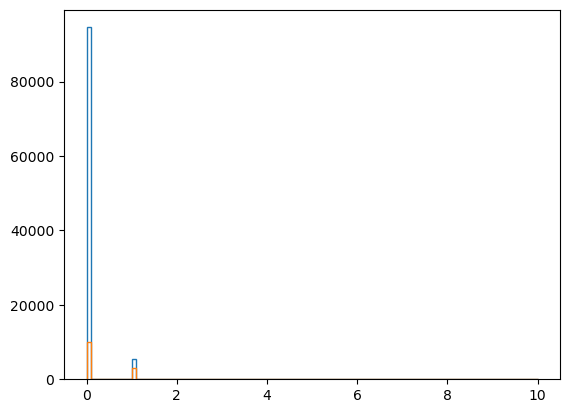

In [12]:
h=plt.hist(std['ncomp'][cut],bins=100, range=(0,10), histtype='step')
h=plt.hist(fast['ncomp'],weights=np.exp(fast['w'])*rel_weight, bins=100, range=(0,10), histtype='step')
